In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Read all the data we need to dataframe

In [3]:
## first_clean_recipe
first_clean_recipe_path='./first_clean_recipe/'
dfs=[]
for file in os.listdir(first_clean_recipe_path):
    df = pd.read_csv(os.path.join(first_clean_recipe_path,file))
    df=pd.DataFrame(df['Food_Name']).reset_index(drop=True)
    df['Juan']=file.split('.')[0].split('1_')[1]
    # print(df.shape)
    dfs.append(df)
    # display(df.head())
food_name_juan_df=pd.concat(dfs)
# print(food_name_juan_df.shape)
# display(food_name_juan_df.head())

## categorize
categorize_path='./categorize/'
categories_df = pd.read_csv(os.path.join(categorize_path, 'categories.csv'))
effect_df = pd.read_csv(os.path.join(categorize_path, 'effect.csv'))
ingredient_category_df = pd.read_csv(os.path.join(categorize_path, 'ingredient_category.csv'))
methods_df = pd.read_csv(os.path.join(categorize_path, 'methods.csv'))
# display(categories_df.head())
# display(effect_df.head())
# display(ingredient_category_df.head())
# display(methods_df.head())

## translation_recipe_v1
translation_receipe_path='./translation_recipe_v1_utf8/'
dfs=[]
for file in os.listdir(translation_receipe_path):
    # Specify the encoding when reading the CSV file
    df = pd.read_csv(os.path.join(translation_receipe_path,file), encoding='utf-8')
    dfs.append(df)
translation_receipe_df=pd.concat(dfs).reset_index(drop=True)
# display(translation_receipe_df.head())

## ingredient
ingredient_path='./ingredient/'
files=['v1_JuanDiErShenXianFuShi.csv_ingredient.csv','v1_JuanDiErShiLiaoZhuBing.csv_ingredient.csv','v1_JuanDiErZhuBanTangJian.csv_ingredient.csv','v1_JuanDiYiJuZhenYiZhuan_1.csv_ingredient.csv', 'v1_JuanDiYiJuZhenYiZhuan_2.csv_ingredient.csv','v1_JuanDiYiJuZhenYiZhuan_3.csv_ingredient.csv']
dfs=[]
# total_shape=[0,3]
for file_name in files:
    df = pd.read_csv(os.path.join(ingredient_path, file_name),encoding = "UTF-8")
    dfs.append(df)
    # total_shape[0]+=df.shape[0]
ingredient_df=pd.concat(dfs).reset_index(drop=True)
# print(ingredient_df.shape)
# display(ingredient_df.head())


## unique_categorize
unique_categorize_path='./unique_categorize/'
unique_ingredient_category_df=pd.read_csv(os.path.join(unique_categorize_path,'unique_ingredient_category.csv'))
unique_categories_df=pd.read_csv(os.path.join(unique_categorize_path,'unique_categories.csv'))
unique_effect_df=pd.read_csv(os.path.join(unique_categorize_path,'unique_effect.csv'))
unique_methods_df=pd.read_csv(os.path.join(unique_categorize_path,'unique_methods.csv'))
# display(unique_ingredient_category_df.head())
# display(unique_categories_df.head())
# display(unique_effect_df.head())
# display(unique_methods_df.head())

**Dataframes we have now:**

- `food_name_juan_df`: Food_Name, Juan

- `categories_df`: category, Food_Name

- `effect_df`: Effect, Food_Name

- `ingredient_category_df`: Ingredient, category

- `methods_df`: method, Food_Name

- `translation_receipe_df`: Food_Name, Effect, Ingredients, Steps

- `ingredient_df`: Food_Name, Ingredient, Amount

- `unique_ingredient_category_df`: category

- `unique_categories_df`: category

- `unique_effect_df`: Effect

- `unique_methods_df`: method




### Data analysis
- effect frequency
- cooking method frequency

In [24]:
# Setting chinese font for matplotlib
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial']

#### Effect frequency

In [25]:
unique_effect=unique_effect_df['Effect'].tolist()
print('There are {} unique effects.'.format(len(unique_effect)))

effect_count=effect_df.value_counts(subset=['Effect'])#reset_index()
effect_propotion=effect_df.value_counts(subset=['Effect'], normalize=True).reset_index()
effect_frequncy=pd.merge(effect_count,effect_propotion,on='Effect')
print('Show the 10 most frequent effects')
display(effect_frequncy.head())

There are 217 unique effects.
Show the 10 most frequent effects


,Effect,count,proportion
0,补中益气,28,0.084592
1,治中风,7,0.021148
2,补中,7,0.021148
3,顺气,6,0.018127
4,生津止渴,6,0.018127


In [32]:
effect_df.explode().value_counts(subset=['Effect'])#reset_index()

TypeError: explode() missing 1 required positional argument: 'column'

In [ ]:
effect_count.values.tolist()

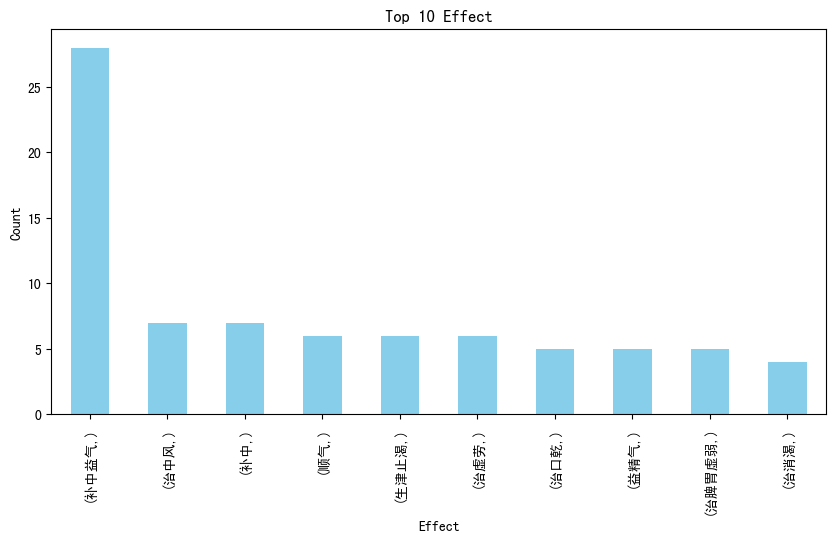

In [26]:
# bar chart "top 10 most frequent effect"
plt.figure(figsize=(10, 5))
effect_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Effect')
plt.xlabel('Effect')
plt.ylabel('Count')
plt.show()

#### Cooking method frequency

In [27]:
unique_method=unique_methods_df['method'].tolist()
print('There are {} unique methods.'.format(len(unique_method)))

method_count=methods_df.value_counts(subset=['method'])#.reset_index()
method_propotion=methods_df.value_counts(subset=['method'], normalize=True).reset_index()
method_frequency=pd.merge(method_count, method_propotion, on='method')

print('Show the 10 most frequent methods')
display(method_frequency.head(10))

There are 10 unique methods.
Show the 10 most frequent methods


,method,count,proportion
0,熬,67,0.320574
1,煮,54,0.258373
2,炒,36,0.172249
3,煎,18,0.086124
4,蒸,9,0.043062
5,炸,8,0.038278
6,烧,7,0.033493
7,淹,5,0.023923
8,炙,3,0.014354
9,焙,2,0.009569


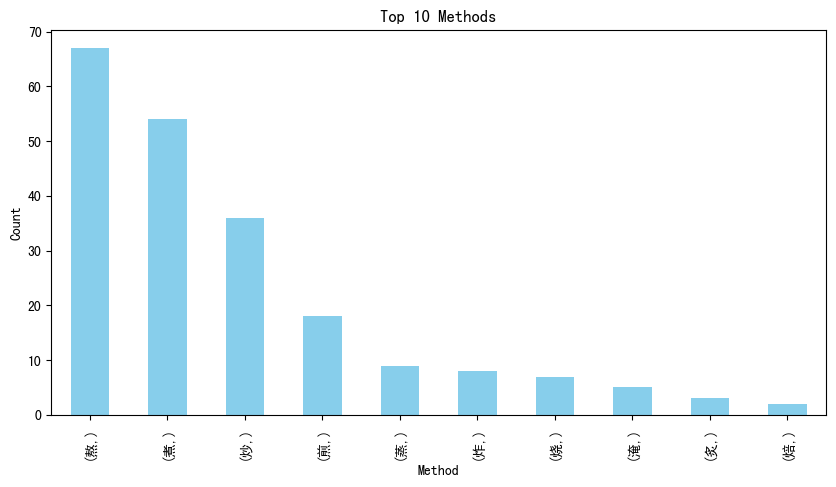

In [28]:
# bar chart "top 10 most frequent methods"
plt.figure(figsize=(10, 5))
method_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Methods')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()